# Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

## Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?


In [1]:
import pandas as pd

In [3]:
df =pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [10]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [28]:
frequency_table = pd.DataFrame(df['category'].value_counts()).reset_index()

In [8]:
pd.crosstab(df['category'],columns='count')

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [9]:
df.groupby('category').size()

category
3D Printers                         248
3D Printing & Scanning             4067
Abrasive & Finishing Products       250
Action Cameras                     1697
Adapters                            254
                                  ...  
Wind Instruments                    250
Window Treatments                   239
Women                             17772
Women's Sports & Outdoor Shoes     1959
eBook Readers & Accessories         246
Length: 296, dtype: int64

In [12]:
pd.pivot_table(data=df,index='category',values='uid',aggfunc='count')

,uid
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [15]:
frequency_table.head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

## Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

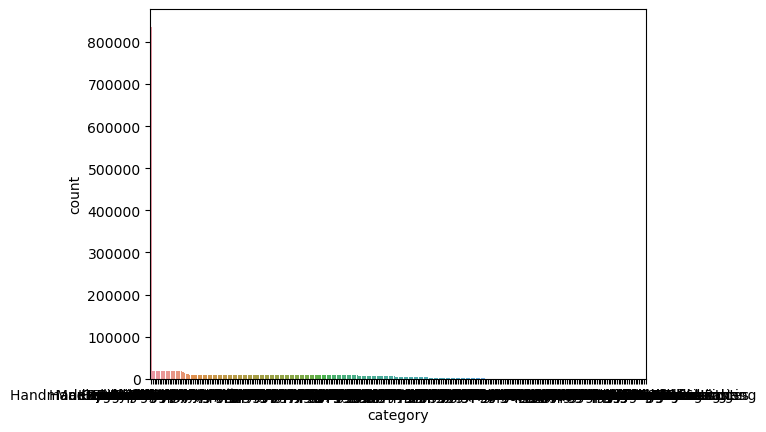

In [21]:
sns.barplot(frequency_table,x='category',y='count')

In [22]:
frequency_table.shape

(296,)

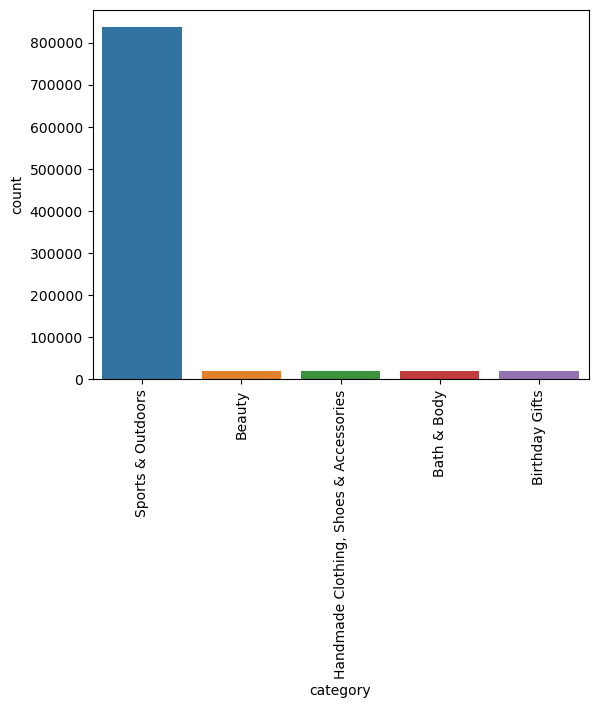

In [27]:
sns.barplot(frequency_table.head(),x='category',y='count')
plt.xticks(rotation=90);

In [31]:
frequency_table

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Alexa Built-In Devices,107
292,Motorbike Chassis,107
293,Plugs,107
294,Smart Home Security & Lighting,104


<Axes: ylabel='count'>

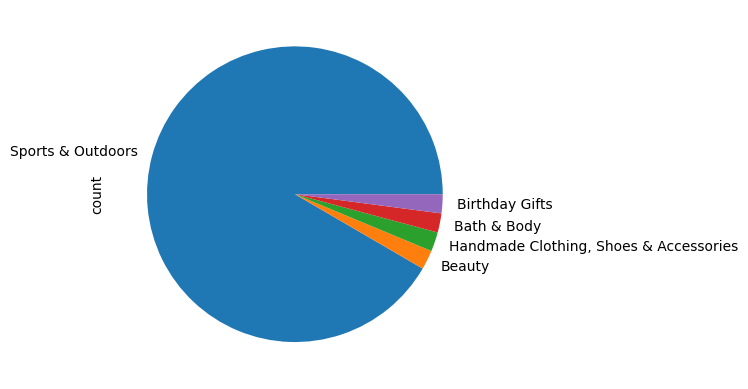

In [42]:
df['category'].value_counts().head().plot(kind='pie')


# Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

## Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [50]:
print(f"Average {df['price'].mean()},median {df['price'].median()}, mode {df['price'].mode()[0]}")


Average 89.24380943923663,median 19.09, mode 9.99


## Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [53]:
print(f"""Variance {df['price'].var()},standard deviation {df['price'].std()},
range {df['price'].max()-df['price'].min()}, IQR {df['price'].quantile(0.75)-df['price'].quantile(0.25)} """)

Variance 119445.48532256528,standard deviation 345.60886175352226,
range 100000.0, IQR 36.0 


## Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [85]:
cut_price = pd.DataFrame(pd.cut(
    df['price'],bins=[0,10,20,30,40,50,60,70,80,90,100,500,1000,10000,1000000]).value_counts()
                         .sort_index()).reset_index()

C:\Users\raian\miniconda3\envs\2024\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


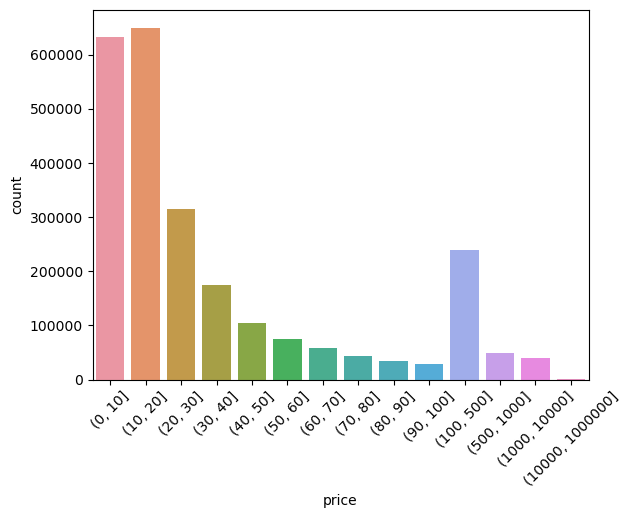

In [88]:
sns.barplot(cut_price,x='price',y='count')
plt.xticks(rotation=45);

C:\Users\raian\miniconda3\envs\2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


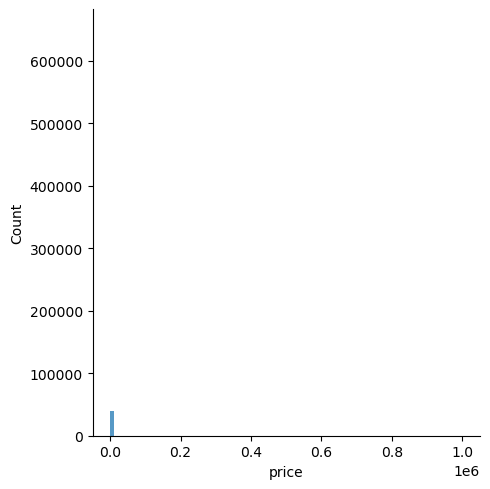

In [78]:
sns.displot(data=df,x='price',bins=[0,10,20,30,40,50,60,70,80,90,100,500,1000,10000,1000000])

<Axes: >

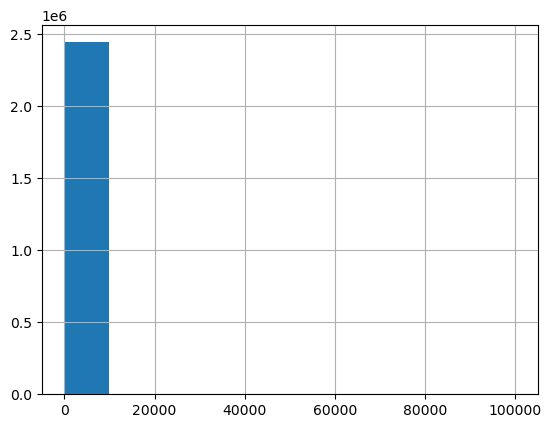

In [114]:
df['price'].hist()

<Axes: >

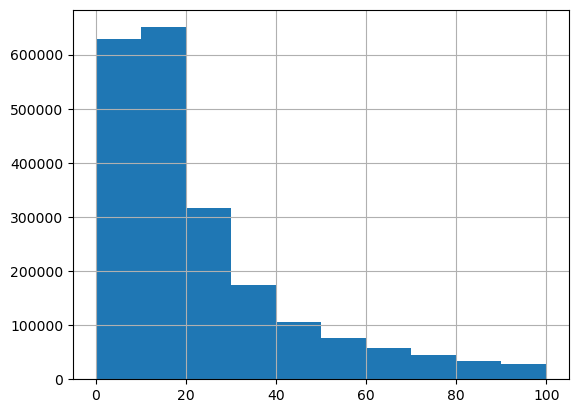

In [68]:
df['price'].hist()

<Axes: >

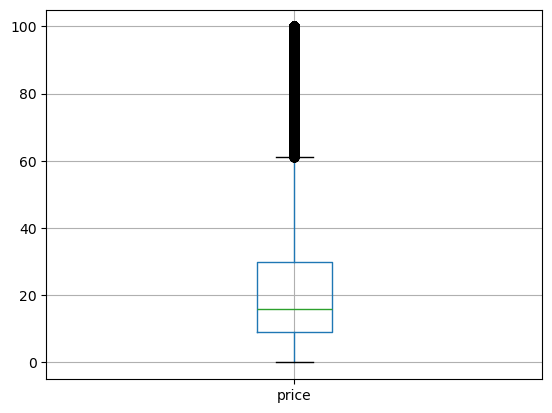

In [60]:
df.query('price<100').boxplot(column='price')


In [90]:
pd.cut(df['price'],bins=[0,60,100,1000000]).value_counts().sort_index()

price
(0, 60]           1953264
(60, 100]          163113
(100, 1000000]     327254
Name: count, dtype: int64

# Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [92]:
df['stars']

0          4.7
1          4.7
2          4.7
3          4.7
4          4.6
          ... 
2443646    0.0
2443647    0.0
2443648    0.0
2443649    4.3
2443650    4.5
Name: stars, Length: 2443651, dtype: float64

In [93]:
print(f"Average {df['stars'].mean()},median {df['stars'].median()}, mode {df['stars'].mode()[0]}")

Average 2.152836472966065,median 0.0, mode 0.0


In [99]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [105]:
((df['reviews']==0) &(df['stars']==0))

0          False
1          False
2          False
3          False
4          False
           ...  
2443646     True
2443647     True
2443648     True
2443649    False
2443650    False
Length: 2443651, dtype: bool

In [104]:
~((df['reviews']==0) &(df['stars']==0))

0           True
1           True
2           True
3           True
4           True
           ...  
2443646    False
2443647    False
2443648    False
2443649     True
2443650     True
Length: 2443651, dtype: bool

In [103]:
df_bought = df.loc[~((df['reviews']==0) &(df['stars']==0))]
print(f"Average {df_bought['stars'].mean()},median {df_bought['stars'].median()}, mode {df_bought['stars'].mode()[0]}")

Average 4.31916076222691,median 4.4, mode 4.5


## Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [108]:
df.loc[((df['reviews']>0) &(df['stars']==0))]

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category


In [106]:
print(f"""Variance {df['stars'].var()},standard deviation {df['stars'].std()},
range {df['stars'].max()-df['stars'].min()}, IQR {df['stars'].quantile(0.75)-df['stars'].quantile(0.25)} """)

Variance 4.81743402976196,standard deviation 2.1948653785054697,
range 5.0, IQR 4.4 


In [107]:
df_bought = df.loc[~((df['reviews']==0) &(df['stars']==0))]
print(f"""Variance {df_bought['stars'].var()},standard deviation {df_bought['stars'].std()},
range {df_bought['stars'].max()-df_bought['stars'].min()}, IQR {df_bought['stars'].quantile(0.75)-df_bought['stars'].quantile(0.25)} """)

Variance 0.3083433752380519,standard deviation 0.5552867504614637,
range 4.0, IQR 0.5 


## Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?


In [112]:
df['stars'].value_counts().head()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
Name: count, dtype: int64

In [110]:
print(f"Skewness {df['stars'].skew()}, kurtosis {df['stars'].kurtosis()}")

Skewness 0.08120735761080985, kurtosis -1.9260061280432985


In [115]:
df_bought = df.loc[~((df['reviews']==0) &(df['stars']==0))]
print(f"Skewness {df_bought['stars'].skew()}, kurtosis {df_bought['stars'].kurtosis()}")

Skewness -2.3795681122127945, kurtosis 9.78193769066435


## Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: >

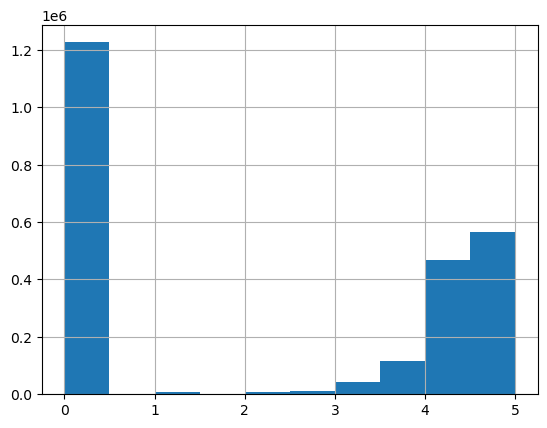

In [116]:
df['stars'].hist()

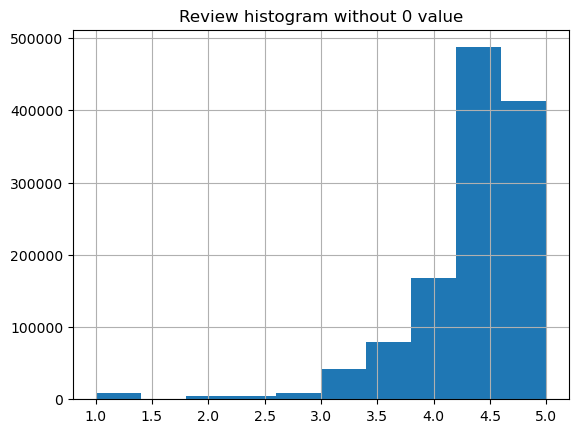

In [119]:
df_bought['stars'].hist()
plt.title('Review histogram without 0 value');